## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = 'data/plants/'

In [4]:
ls {PATH}

labels.csv             sample_submission.csv.zip  test/     train/
models/                submission_resnet34.csv    test.zip  train.zip
sample_submission.csv  submission_resnet50.csv    tmp/


In [5]:
# Using Resnet50 from pytorch 
arch = resnet50

label_csv = f'{PATH}labels.csv'


label_df = pd.read_csv(label_csv)
# Remplace all empty space by _
label_df.species = label_df.species.apply(lambda x: re.sub(' ', '_', x))


# Leave only one image for validation
n = len(list(open(label_csv)))-1
val_idxs = [0]
print(val_idxs)

[0]


In [6]:
def get_data(sz):
    # Augment our data
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 
                                        'train',
                                        label_csv, 
                                        bs=124,
                                        tfms=tfms,
                                        val_idxs=val_idxs, 
                                        test_name='test')

## Training

### Start training with small images 64x64

In [7]:
sz = 64
data = get_data(sz)

In [8]:
# Load already trained model (with validation set)
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.load(f'resnet_50_299')

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      3.397547   0.0        1.0       



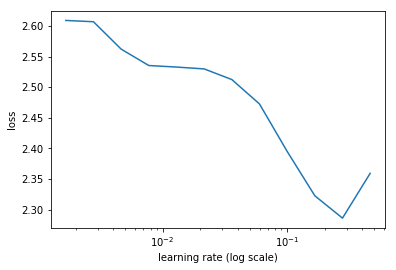

In [9]:
lrf=learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.095454   0.396662   1.0       
    1      0.761523   0.133774   1.0                       
    2      0.597585   0.174529   1.0                       
    3      0.533057   0.187537   1.0                       
    4      0.488433   0.128182   1.0                       
    5      0.447448   0.06608    1.0                       
    6      0.416165   0.118514   1.0                       



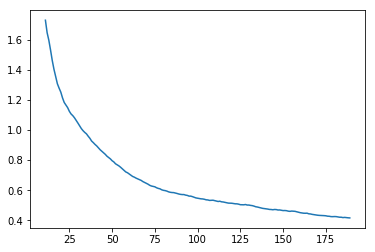

In [10]:
lr = 0.2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.492975   0.296412   1.0       
    1      0.357499   0.139953   1.0                       
    2      0.280155   0.120451   1.0                       
    3      0.253236   0.071118   1.0                       
    4      0.218125   0.064192   1.0                       
    5      0.183965   0.07823    1.0                       
    6      0.158887   0.026493   1.0                       



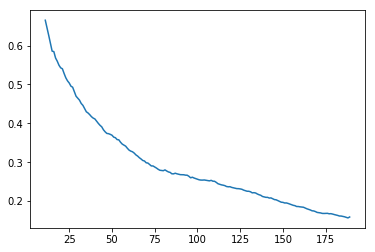

In [11]:
lrs = np.array([lr/9,lr/3,lr])

learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

#### Change size to 128 x 128

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.184755   0.176265   1.0       
    1      0.153225   0.114086   1.0                       
    2      0.130028   0.148845   1.0                       
    3      0.124926   0.265935   1.0                       
    4      0.116713   0.072375   1.0                       
    5      0.106713   0.10235    1.0                       
    6      0.101946   0.087873   1.0                       



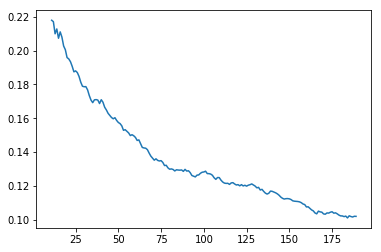

In [12]:
sz=128

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.098668   1.481494   0.0       
    1      0.100794   0.0202     1.0                        
    2      0.081347   0.015573   1.0                        
    3      0.076551   0.086595   1.0                        
    4      0.069217   0.010708   1.0                        
    5      0.058999   0.987286   0.0                        
    6      0.050606   0.547919   1.0                        



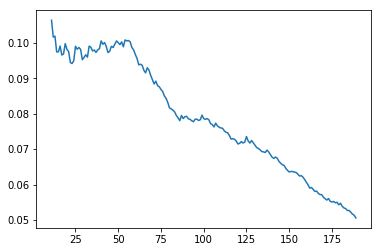

In [13]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

#### Change size to 256 x 256

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.104432   0.352652   1.0       
    1      0.087917   0.574866   1.0                        
    2      0.074789   0.302708   1.0                        
    3      0.06855    0.260798   1.0                        
    4      0.064842   0.482932   1.0                        
    5      0.058971   0.482021   1.0                        
    6      0.054707   0.473455   1.0                        



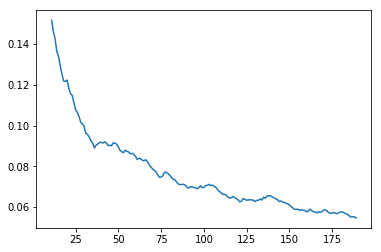

In [14]:
sz=256

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.055671   0.030928   1.0       
    1      0.05672    1.492817   0.0                        
    2      0.047187   0.020068   1.0                        
    3      0.035685   0.023807   1.0                        
    4      0.034293   0.002314   1.0                        
    5      0.037966   0.317354   1.0                        
    6      0.034644   0.029818   1.0                        
    7      0.027326   0.127596   1.0                        
    8      0.024068   0.101549   1.0                        
    9      0.021219   0.013675   1.0                        
    10     0.016809   0.037667   1.0                        
    11     0.01457    0.065646   1.0                        
    12     0.012877   0.070693   1.0                        



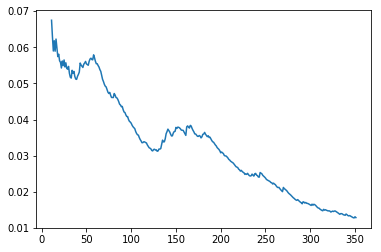

In [15]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.save(f'resnet_50_256_NOVALID')
learn.sched.plot_loss()

#### Change size to 299 x 299

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.014891   0.000498   1.0       
    1      0.014551   0.000432   1.0                        
    2      0.014992   0.000645   1.0                        
    3      0.013363   0.000646   1.0                        
    4      0.011679   0.000403   1.0                        
    5      0.013222   0.000681   1.0                        
    6      0.014156   0.000679   1.0                        



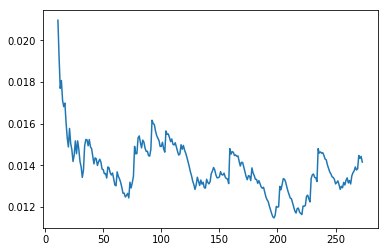

In [17]:
sz=299
data = get_data(sz)
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.load(f'resnet_50_256_NOVALID')
lr = 0.2

# Change lr
lrs = np.array([lr/18,lr/6,lr/2])

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.017745   0.004964   1.0       
    1      0.029721   1.3e-05    1.0                        
    2      0.026569   0.001799   1.0                        
    3      0.033025   0.064493   1.0                        
    4      0.036802   0.016401   1.0                        
    5      0.026651   0.01104    1.0                        
    6      0.022665   0.060537   1.0                        



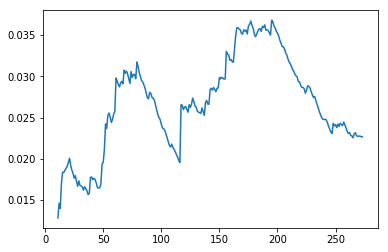

In [12]:
lr = 0.2
lrs = np.array([lr/18,lr/6,lr/2])

learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'resnet_50_299_NOVALID')
learn.sched.plot_loss()

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

(accuracy_np(preds,y), metrics.log_loss(y, preds))
# preds.shape, y.shape

### Prediction and submition

In [18]:
log_preds_test = learn.predict(is_test=True)
log_preds_test.shape

(794, 12)

In [19]:
# replace _ by " " for submition
#label_df.species = label_df.species.apply(lambda x: re.sub(' ', '_', x))

log_preds_test = np.argmax(log_preds_test, axis=1)
preds_classes = [data.classes[i].replace("_", " ") for i in log_preds_test]
probs = np.exp(log_preds_test)


submission = pd.DataFrame({'file': os.listdir(f'{PATH}test'), 'species': preds_classes})
submission.to_csv('data/plants/submission_resnet50_NOVALID.csv', index=False)

In [20]:
from IPython.display import FileLink
FileLink('data/plants/submission_resnet50_NOVALID.csv')

/home/paperspace/fastai/courses/dl1/data/plants/submission_resnet50_NOVALID.csv

In [ ]:
submission.head(5)

### Give us score of 0.97984 (with validation 0.9703)